# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 654


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | naantali
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | benguela
Processing Record 7 of Set 1 | coihaique
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | calvinia
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | puri
Processing Record 13 of Set 1 | pareora
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | najran
Processing Record 16 of Set 1 | alice springs
Processing Record 17 of Set 1 | alotau
City not found. Skipping...
Processing Record 18 of Set 1 | yichun
Processing Record 19 of Set 1 | palmer
Processing Record 20 of Set 1 | ostersund
Processing Record 21 of Set 1 | sao joao da barra
Processing Record 22 of Set 1 | kahului
Processin

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,297.75,84,100,1.54,US,1682317927
1,victoria,22.2855,114.1577,300.35,87,92,5.36,HK,1682317924
2,naantali,60.4674,22.0243,279.22,94,100,4.63,FI,1682317927
3,bredasdorp,-34.5322,20.0403,292.45,85,100,3.44,ZA,1682317927
4,cabo san lucas,22.8909,-109.9124,297.32,55,100,0.45,MX,1682317928


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,297.75,84,100,1.54,US,1682317927
1,victoria,22.2855,114.1577,300.35,87,92,5.36,HK,1682317924
2,naantali,60.4674,22.0243,279.22,94,100,4.63,FI,1682317927
3,bredasdorp,-34.5322,20.0403,292.45,85,100,3.44,ZA,1682317927
4,cabo san lucas,22.8909,-109.9124,297.32,55,100,0.45,MX,1682317928


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

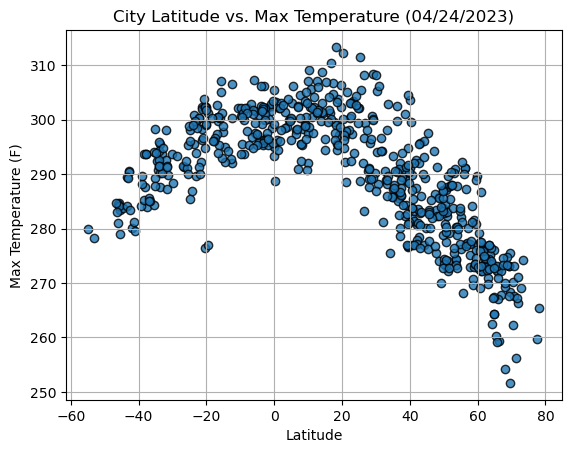

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/24/2023)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

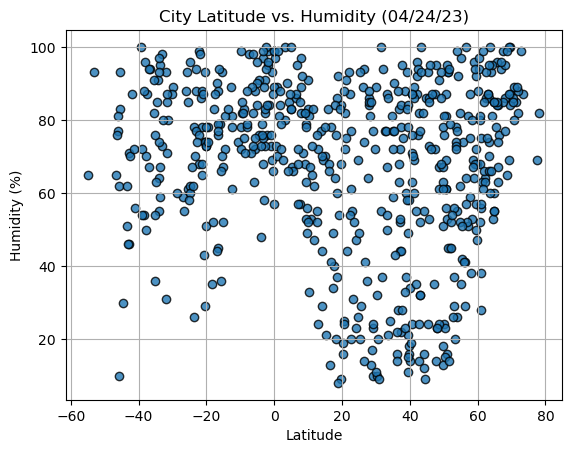

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

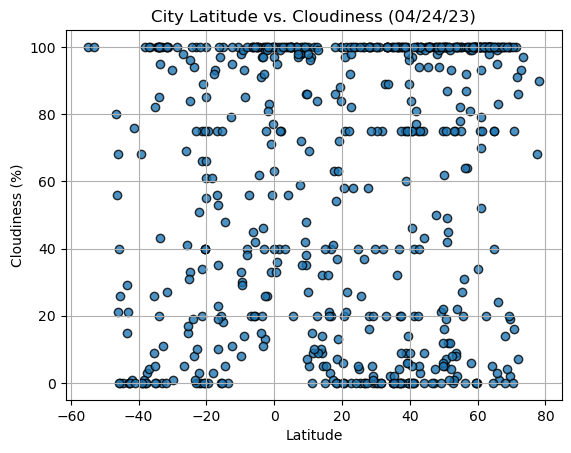

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

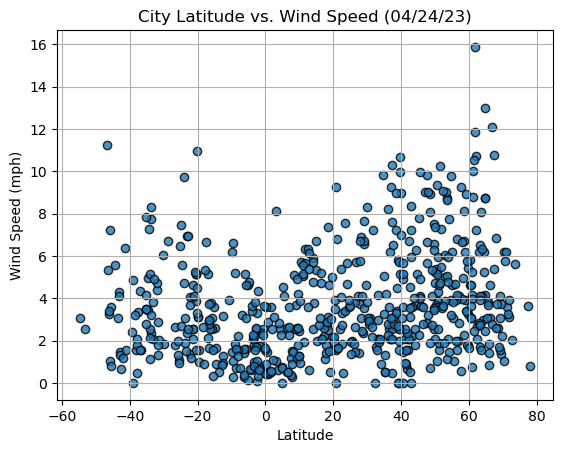

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    """Create and display a linear regression plot."""
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot with linear regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Add line equation and r-squared value to plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(f"r-squared = {round(rvalue**2, 2)}", (text_coordinates[0], text_coordinates[1]-20), fontsize=15, color="red")
    
    # Set title and labels
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    # Display plot
    plt.show()


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,297.75,84,100,1.54,US,1682317927
1,victoria,22.2855,114.1577,300.35,87,92,5.36,HK,1682317924
2,naantali,60.4674,22.0243,279.22,94,100,4.63,FI,1682317927
4,cabo san lucas,22.8909,-109.9124,297.32,55,100,0.45,MX,1682317928
7,albany,42.6001,-73.9662,278.51,82,94,3.13,US,1682317928


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bredasdorp,-34.5322,20.0403,292.45,85,100,3.44,ZA,1682317927
5,benguela,-12.5763,13.4055,300.30,78,95,1.29,AO,1682317928
6,coihaique,-45.5752,-72.0662,283.49,93,0,3.60,CL,1682317928
8,busselton,-33.6500,115.3333,287.57,67,43,7.73,AU,1682317929
9,calvinia,-31.4707,19.7760,289.87,80,100,2.02,ZA,1682317929


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8513721192466387


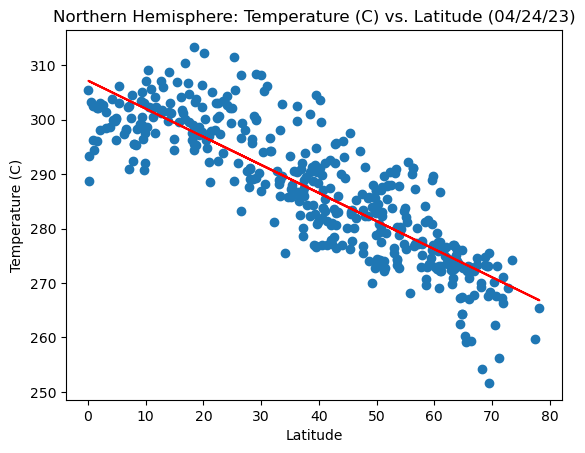

In [73]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere: Temperature (C) vs. Latitude (%s)" % time.strftime("%x"))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
print(f"The r-value is: {rvalue}")
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Temp on.png')
plt.show()


The r-value is: 0.7211781027393165


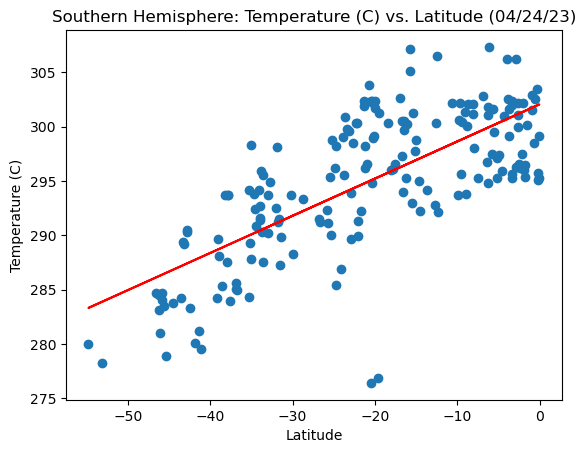

In [74]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere: Temperature (C) vs. Latitude (%s)" % time.strftime("%x"))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
print(f"The r-value is: {rvalue}")
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Temp on.png')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

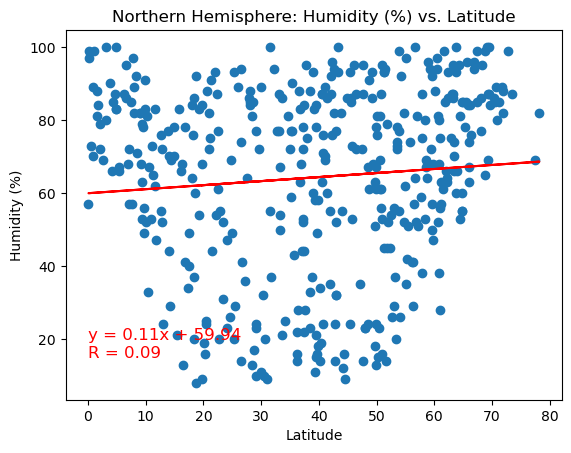

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude")

# Add r-value and equation to plot
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR = {round(rvalue, 2)}", 
             (0,15), fontsize=12, color="red")

# Show plot
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Humidity (%) on.png')
plt.show()

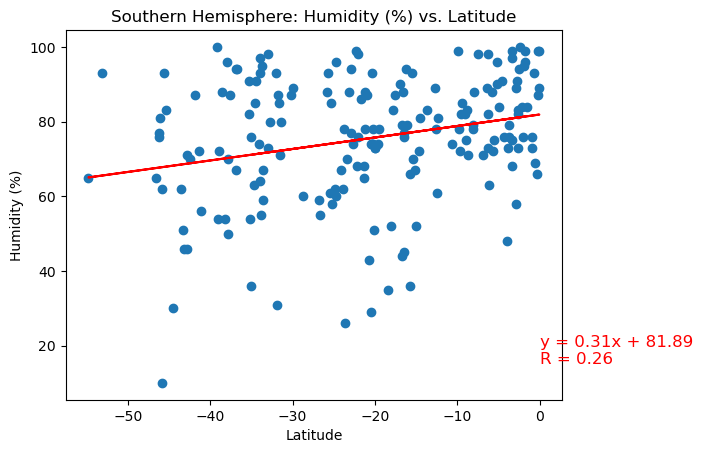

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude")

# Add r-value and equation to plot
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR = {round(rvalue, 2)}", 
             (0,15), fontsize=12, color="red")

# Show plot
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Humidity (%) on.png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

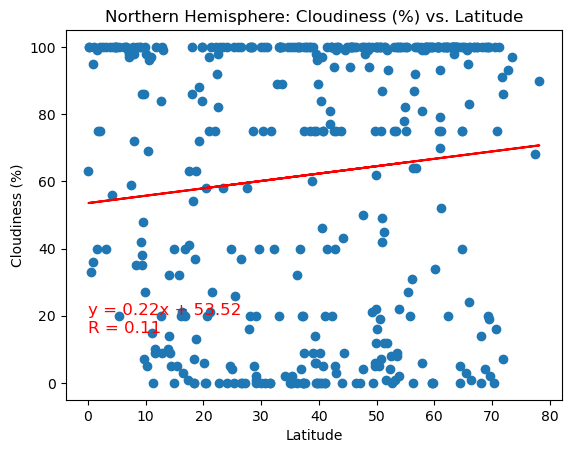

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude")

# Add r-value and equation to plot
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR = {round(rvalue, 2)}", 
             (0,15), fontsize=12, color="red")

# Show plot
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Cloudiness (%).png')
plt.show()

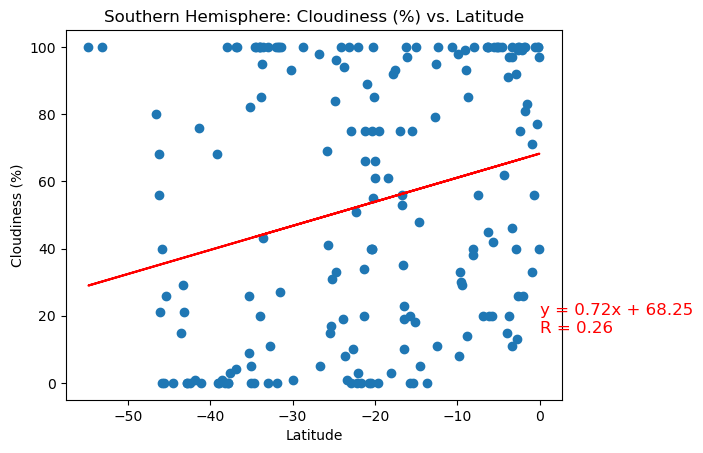

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude")

# Add r-value and equation to plot
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR = {round(rvalue, 2)}", 
             (0,15), fontsize=12, color="red")

# Show plot
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Cloudiness (%).png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

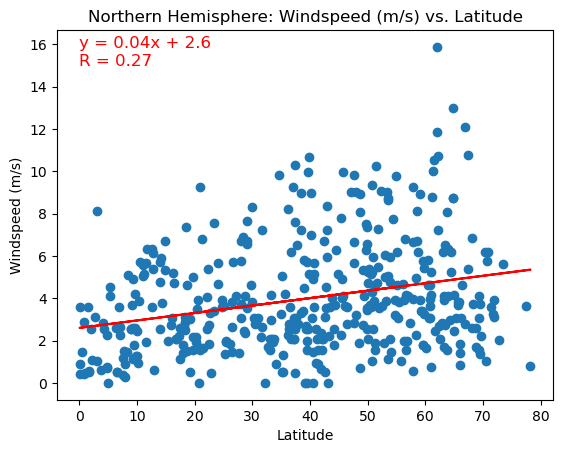

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.title("Northern Hemisphere: Windspeed (m/s) vs. Latitude")

# Add r-value and equation to plot
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR = {round(rvalue, 2)}", 
             (0,15), fontsize=12, color="red")

# Show plot
#plt.savefig(f'output_data/Northern Hemisphere Latitude vs Windspeed (m/s).png')
plt.show()

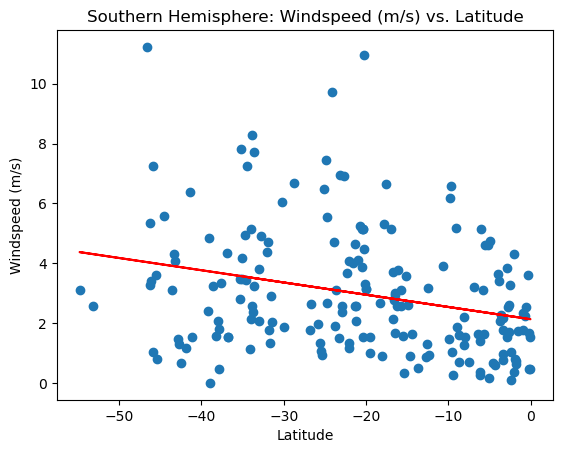

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.title("Southern Hemisphere: Windspeed (m/s) vs. Latitude")

# Add r-value and equation to plot
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR = {round(rvalue, 2)}", 
             (0,15), fontsize=12, color="red")

# Show plot
#plt.savefig(f'output_data/Northern Hemisphere Latitude vs Windspeed (m/s).png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE